In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('box_traj.csv', sep='\s+', names=['Step', 'ID', 'Molecule', 'Type', 'x', 'y', 'z'], index_col=[0, 1, 2, 3])

In [11]:
cation = data.xs(1101, level='ID')
anion = data.xs(1102, level='ID')
t = 2e-3 * cation.index.get_level_values('Step')

In [12]:
cation

,,,x,y,z
Step,Molecule,Type,,,
0,0,4,-1.279040,-6.92667,9.23386
250,0,4,-0.229995,-7.34499,9.23104
500,0,4,0.563610,-7.11807,8.75630
750,0,4,0.357590,-6.12350,8.88189
1000,0,4,0.687237,-6.31582,8.74696
...,...,...,...,...,...
499000,0,4,-1.038140,-7.43326,8.28387
499250,0,4,-0.951410,-7.42209,7.47241
499500,0,4,-0.538950,-8.06389,5.81287


<AxesSubplot:xlabel='Step,Molecule,Type'>

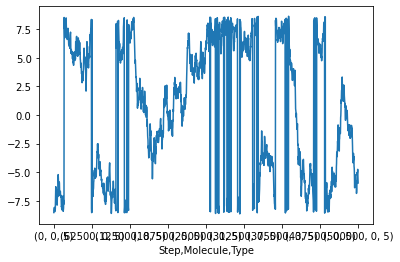

In [17]:
anion.y.plot()

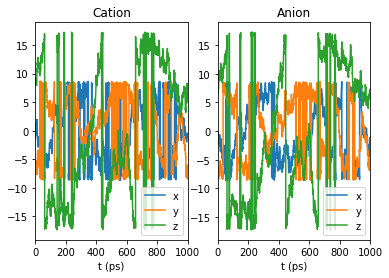

In [23]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(t, cation.x)
ax[0].plot(t, cation.y)
ax[0].plot(t, cation.z)
ax[0].set_title('Cation')
ax[0].set_xlim(0, 1000)
ax[0].set_xlabel('t (ps)')
ax[0].legend(['x', 'y', 'z'])

ax[1].plot(t, anion.x)
ax[1].plot(t, anion.y)
ax[1].plot(t, anion.z)
ax[1].set_title('Anion')
ax[1].set_xlim(0, 1000)
ax[1].set_xlim(0, 1000)
ax[1].set_xlabel('t (ps)')
ax[1].legend(['x', 'y', 'z'])

plt.show()

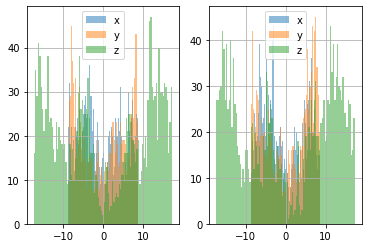

In [26]:
fig, ax = plt.subplots(1, 2)

cation.x.hist(bins=101, alpha=0.5, ax=ax[0])
cation.y.hist(bins=101, alpha=0.5, ax=ax[0])
cation.z.hist(bins=101, alpha=0.5, ax=ax[0])
ax[0].legend(['x', 'y', 'z'])

anion.x.hist(bins=101, alpha=0.5, ax=ax[1])
anion.y.hist(bins=101, alpha=0.5, ax=ax[1])
anion.z.hist(bins=101, alpha=0.5, ax=ax[1])
ax[1].legend(['x', 'y', 'z'])

plt.show()

In [29]:
wc_data = pd.read_csv('data.csv', sep='\s+' )
wc_data

,x,y,wc
0,-8.6212,-8.6212,-5.3326
1,-7.3896,-8.6212,-5.4548
2,-6.1580,-8.6212,-5.5687
3,-4.9264,-8.6212,-5.6725
4,-3.6948,-8.6212,-5.7277
...,...,...,...
191,2.4632,7.3896,-5.4735
192,3.6948,7.3896,-5.4574
193,4.9264,7.3896,-5.4007
194,6.1580,7.3896,-5.3070


In [33]:
x_grid = wc_data.x.to_numpy().reshape(14, 14)
y_grid = wc_data.y.to_numpy().reshape(14, 14)
z_grid = wc_data.wc.to_numpy().reshape(14, 14)

In [34]:
from mpl_toolkits.mplot3d import Axes3D 

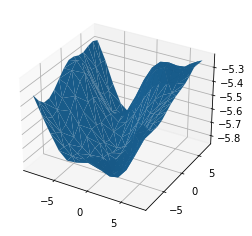

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(wc_data.x, wc_data.y, wc_data.wc)
plt.show()

In [43]:
sys.path.append('/Users/adodin/Documents/CODE/surf2stl-python')

In [45]:
import surf2stl

In [47]:
surf2stl.write('test.stl', x_grid, y_grid, z_grid, mode='ascii')

Wrote 338 facets


In [49]:
slab_data = pd.read_csv('slab_traj.csv', sep='\s+', names=['Step', 'ID', 'Molecule', 'Type', 'x', 'y', 'z'], index_col=[0, 1, 2, 3])

In [50]:
slab_data

x        y        z
Step   ID   Molecule Type                           
0      1102 0        5    -7.86298 -2.71643 -8.03840
       1101 0        4    -5.48806 -4.19042 -7.51144
250    1102 0        5    -6.90835 -3.01965 -7.30983
       1101 0        4    -4.57100 -3.96739 -8.44784
500    1102 0        5    -6.98312 -2.40677 -8.10784
...                            ...      ...      ...
99500  1101 0        4    -7.00865  5.20725 -3.07573
99750  1102 0        5    -7.04231  1.97618 -2.47954
       1101 0        4    -6.45557  4.64400 -2.95019
100000 1102 0        5    -7.50468  2.02769 -1.86644
       1101 0        4    -7.10319  4.86926 -2.17710

[802 rows x 3 columns]

In [73]:
density = pd.read_clipboard(sep='\s+', names=['bin', 'z', 'n', 'rho'], index_col=('bin','z'))
density = density.droplevel('bin')
density

,n,rho
z,,
0.0,0.0000,NaN
-23.5,0.0000,0.000000
-22.5,0.0000,0.000000
-21.5,0.0000,0.000000
-20.5,0.0000,0.000000
-19.5,0.0800,0.000383
-18.5,5.4650,0.065683
-17.5,39.6850,1.307130
-16.5,35.3975,0.964404


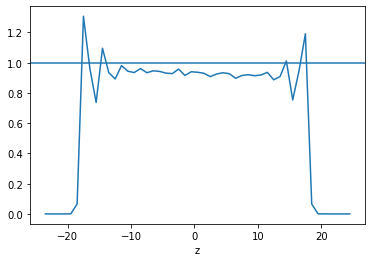

In [74]:
density.rho.plot()
plt.axhline(1.0)